In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Churn.csv')
data1=pd.read_csv('/content/drive/MyDrive/Churn.csv')

In [3]:
data.shape
data1.shape

(7043, 21)

# DATA MANIPULATION

---



In [4]:
data.drop(['customerID','TotalCharges','Churn'],axis=1,inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [5]:
data.shape

(7043, 18)

In [6]:
print(data.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
dtype: int64


In [7]:
cols=data.columns
print(cols)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')


In [8]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
print(cat_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [9]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
dtype: object

In [10]:
#data type changed from object to float for detecting outliers
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'],errors='coerce')

In [11]:
enc_data=list(cat_cols)
enc_data=enc_data[:]
print(enc_data)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [12]:
#encoding the categorical data 
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data[enc_data]=data[enc_data].apply(lambda col:le.fit_transform(col))
data[enc_data].head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [13]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


# DATA VISUALIZATION

---
**The data visualization is done using Tableau**



# **This graph shows the male to female ratio for churn data.The number of male to female are considerable for prediction of churn. Hence, this variable is important.**

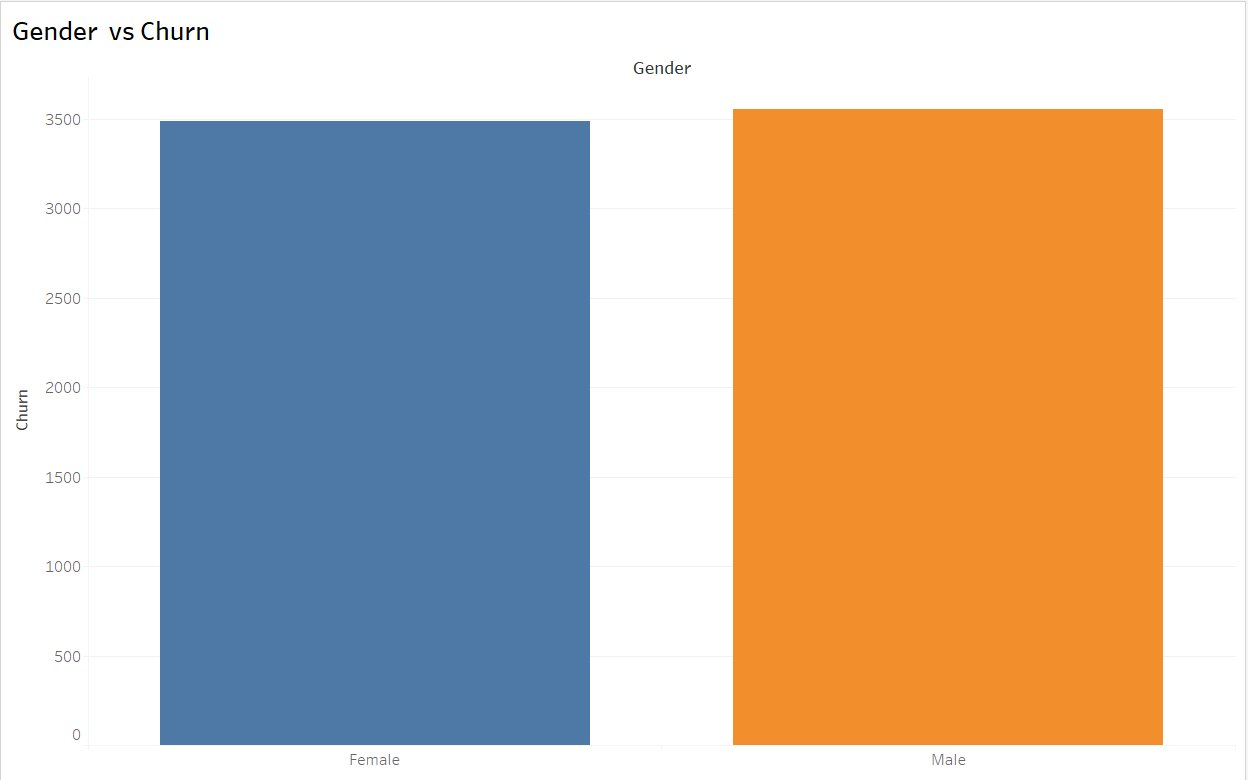

# **This shows the number of senior citizens for the churn data.The number of senior citizens affecting the churn  are considerable for prediction of churn. Hence, this variable is important.**

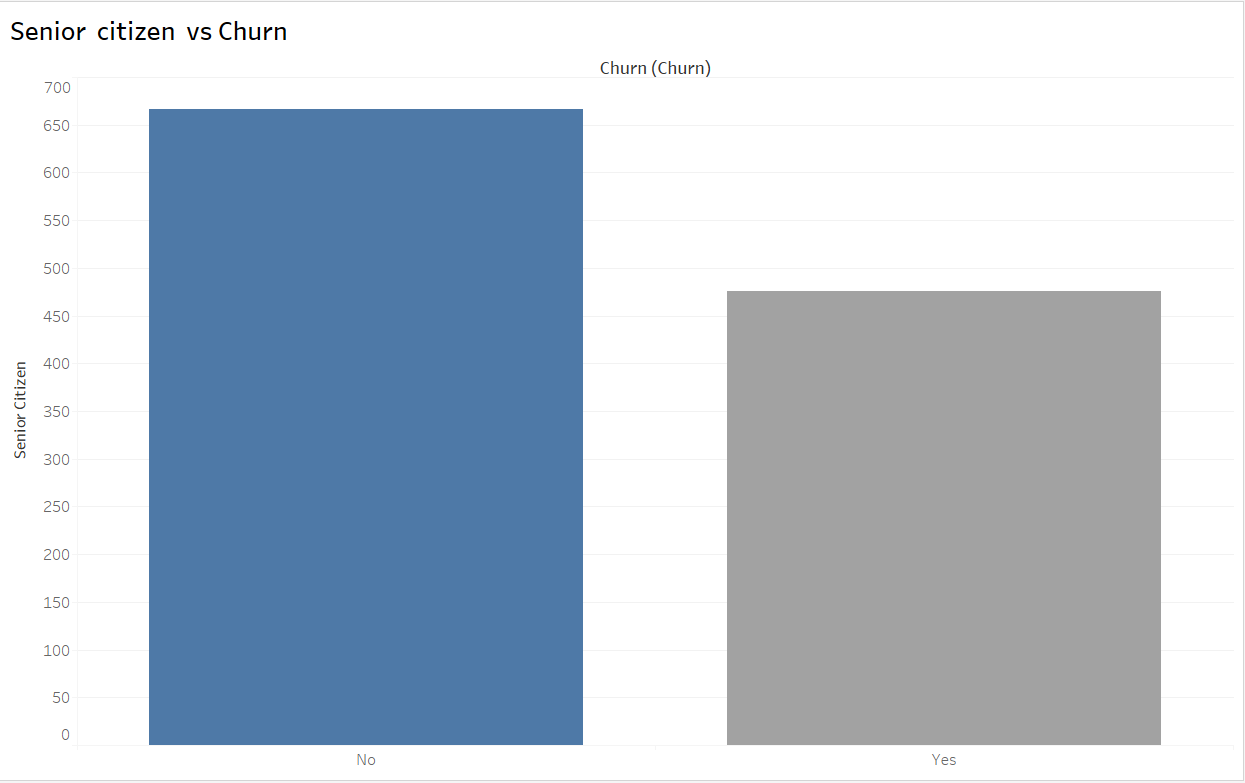

# **The data for variables partner and dependents is adequate hence should be cosidered for the prediction**

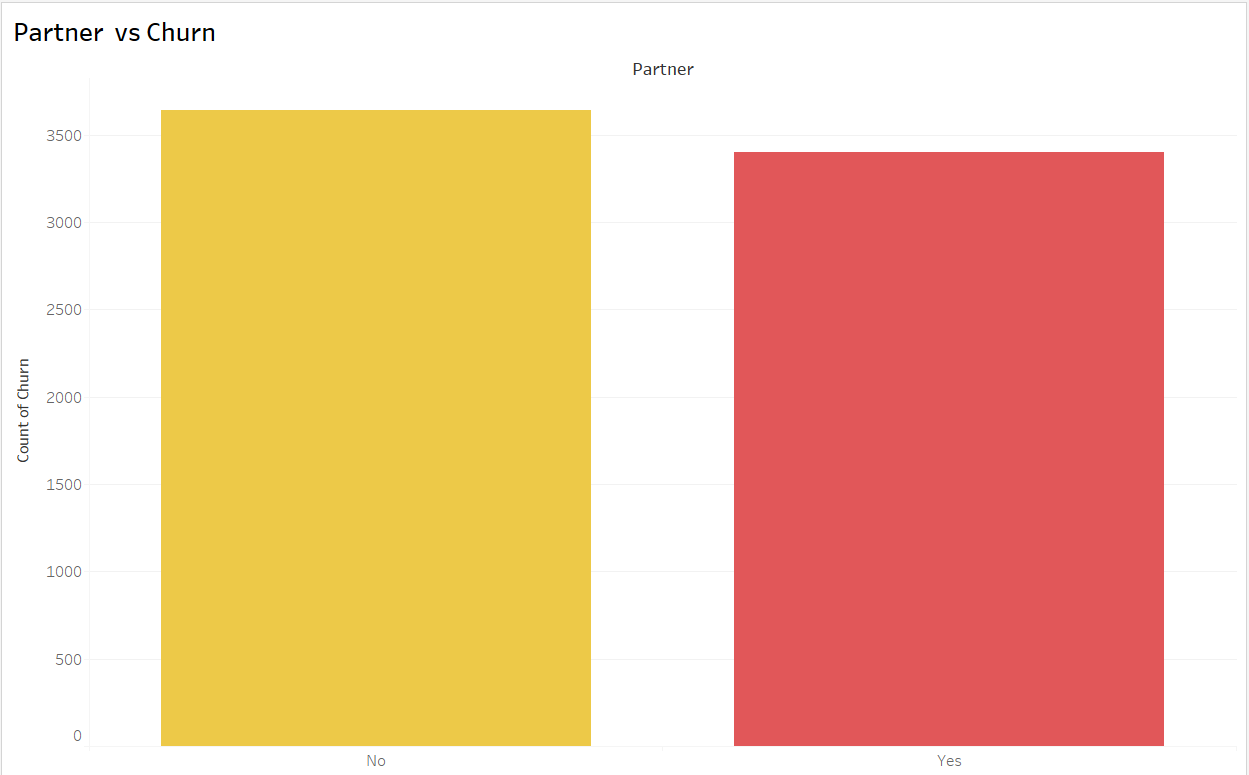

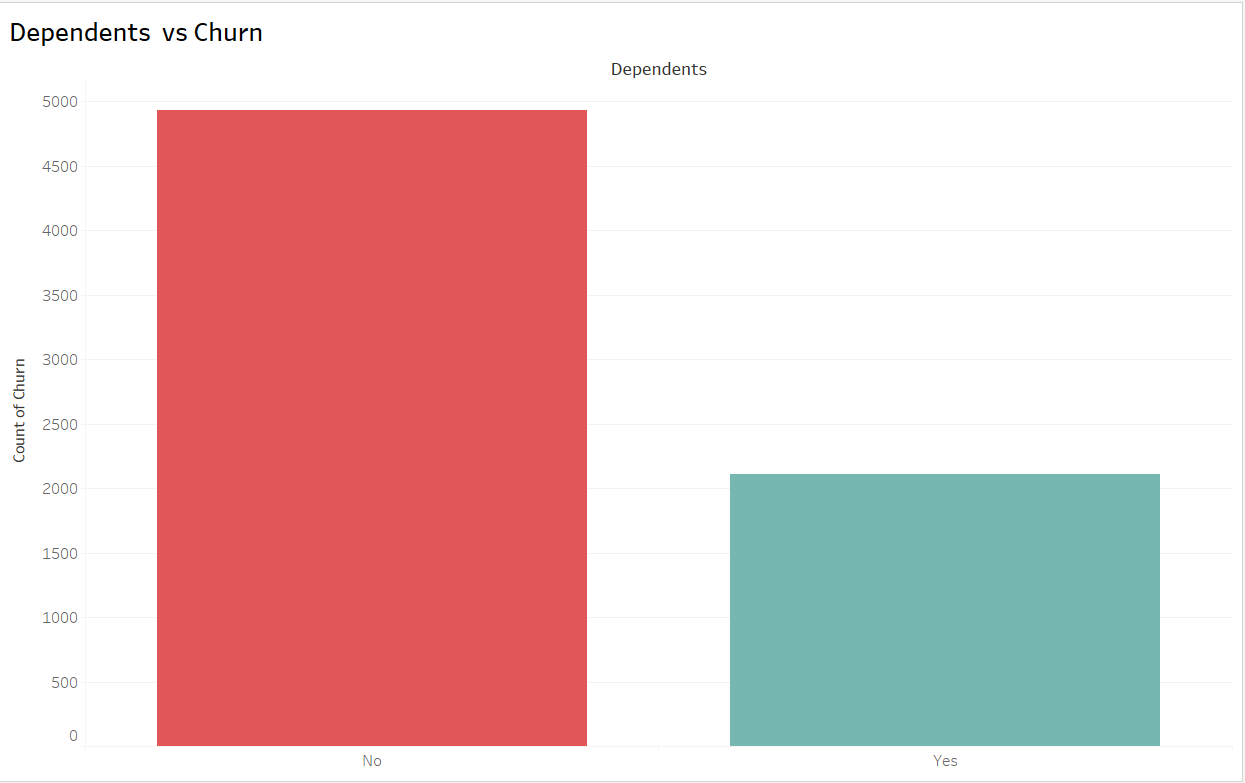

# **The Yes to No ratio for Phone Service varbible is approx. 10% hence this is considerable**

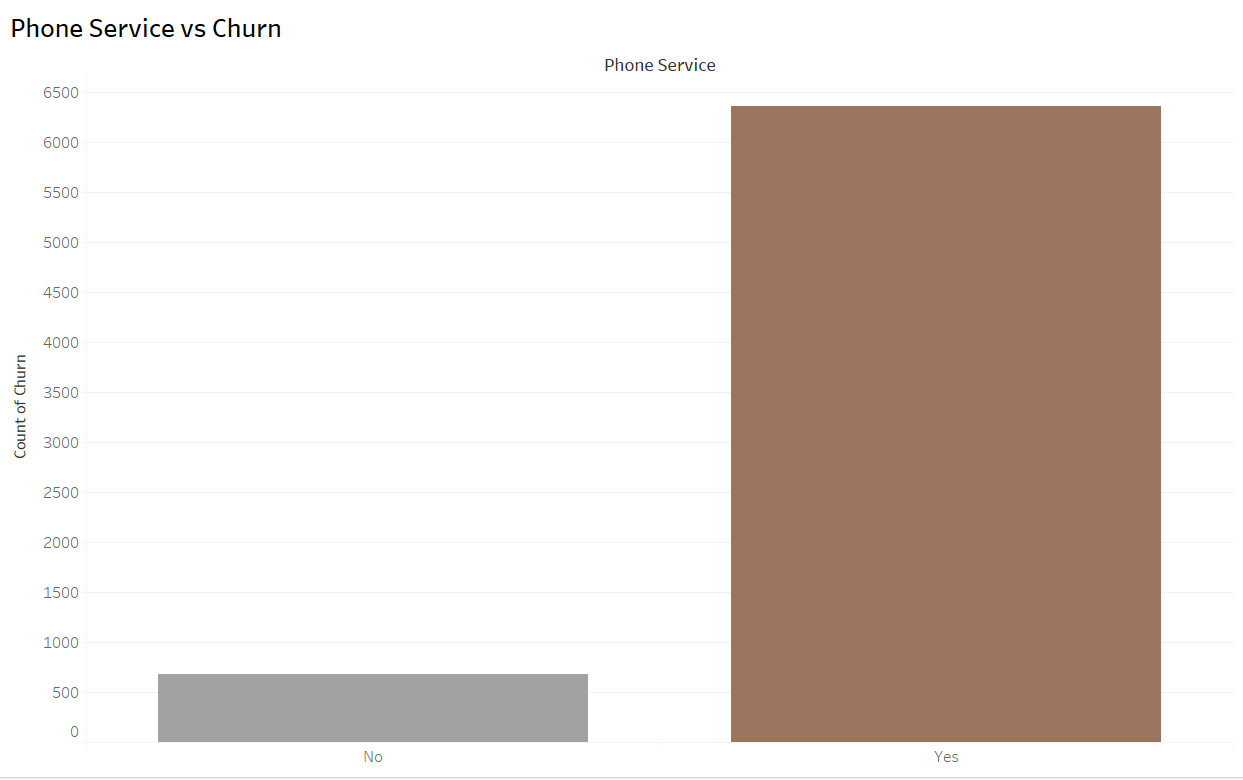

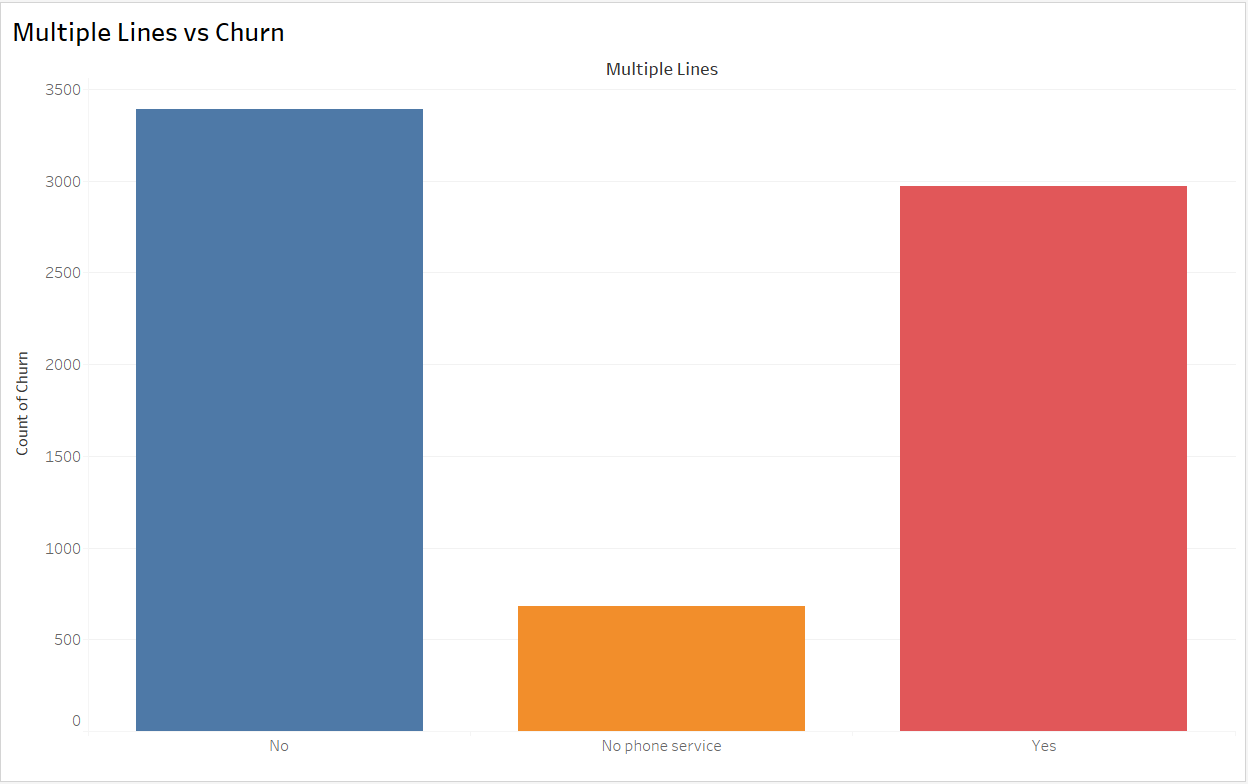

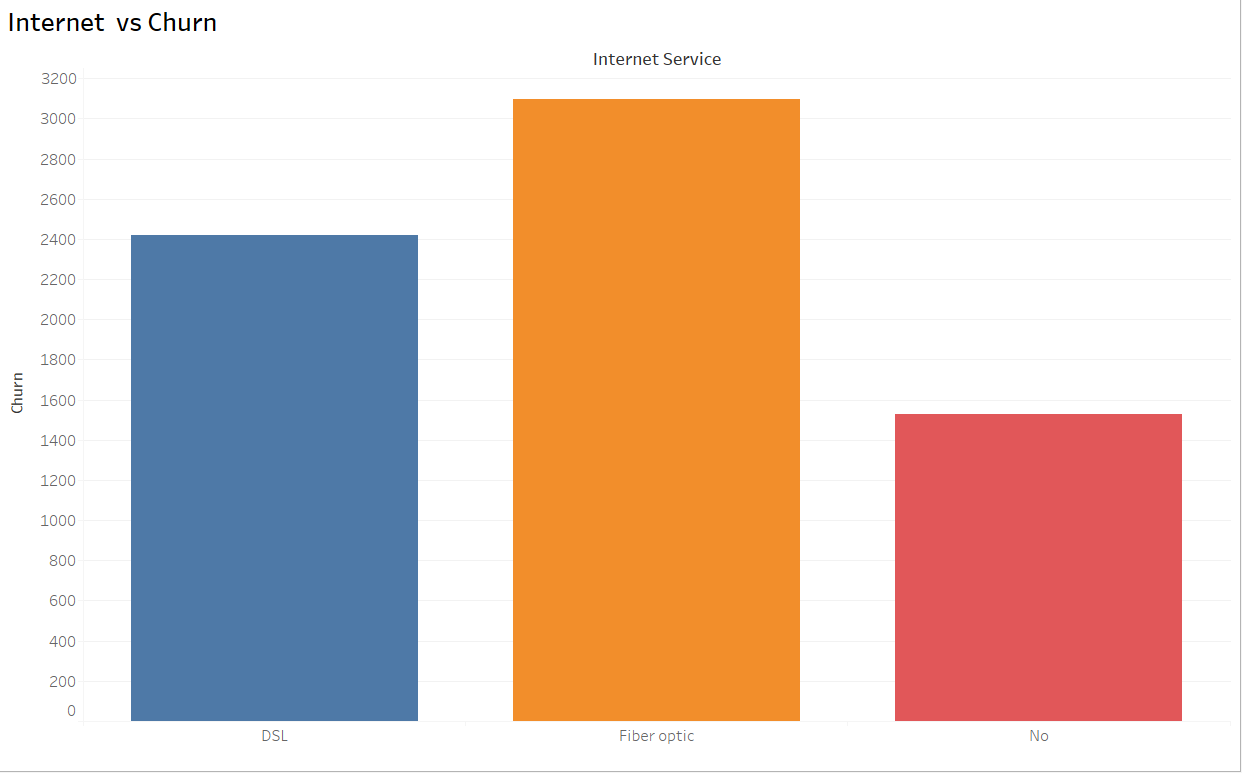

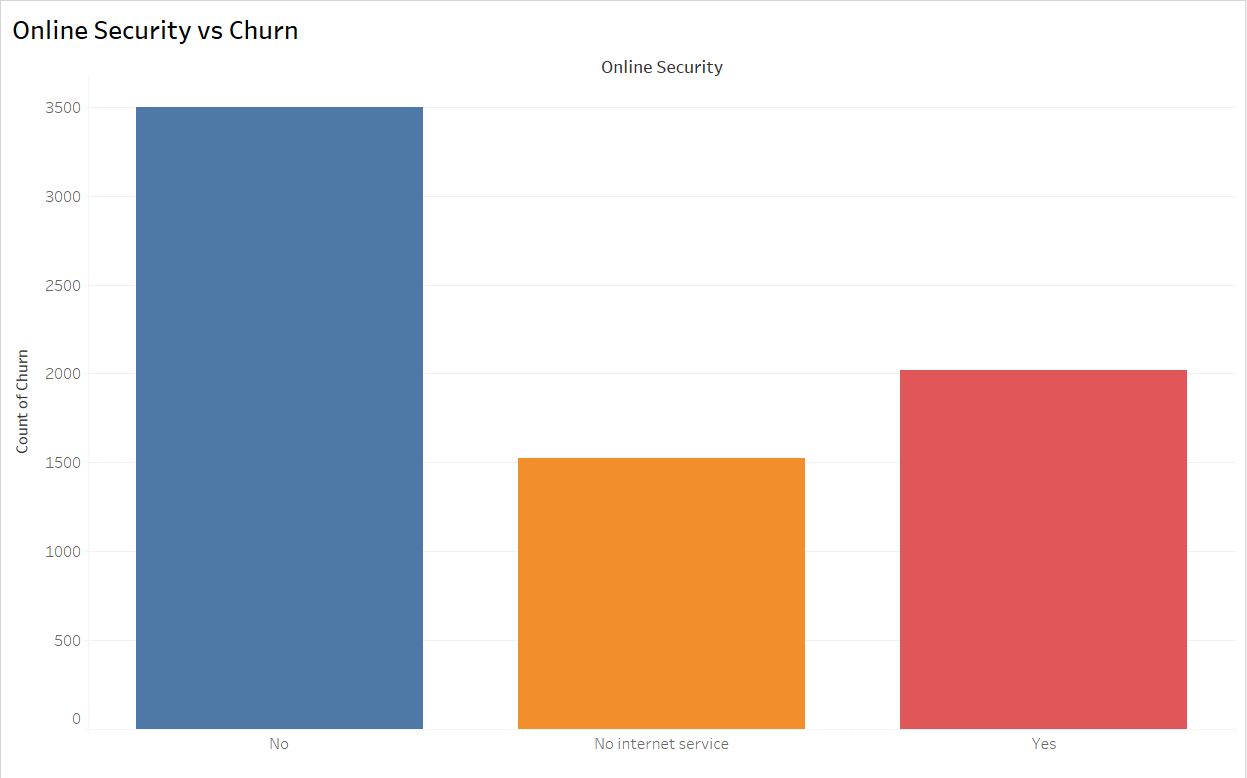

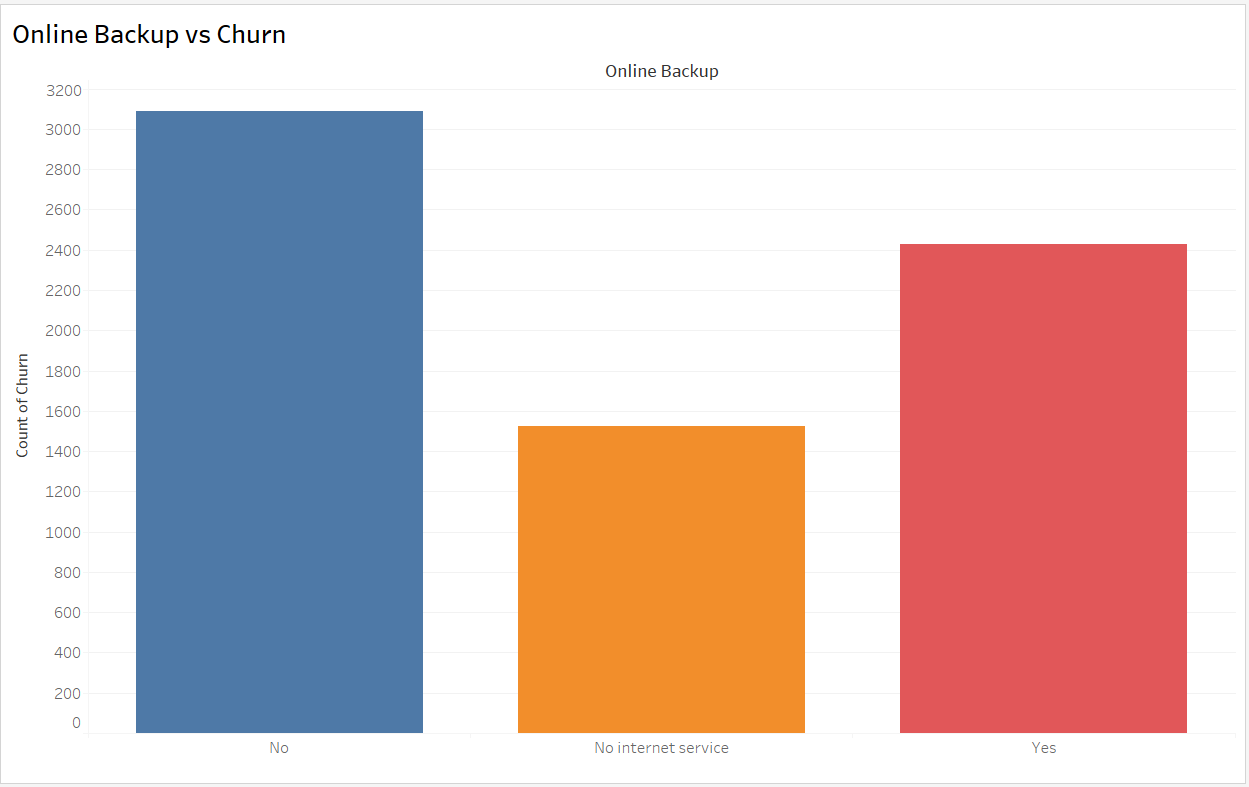

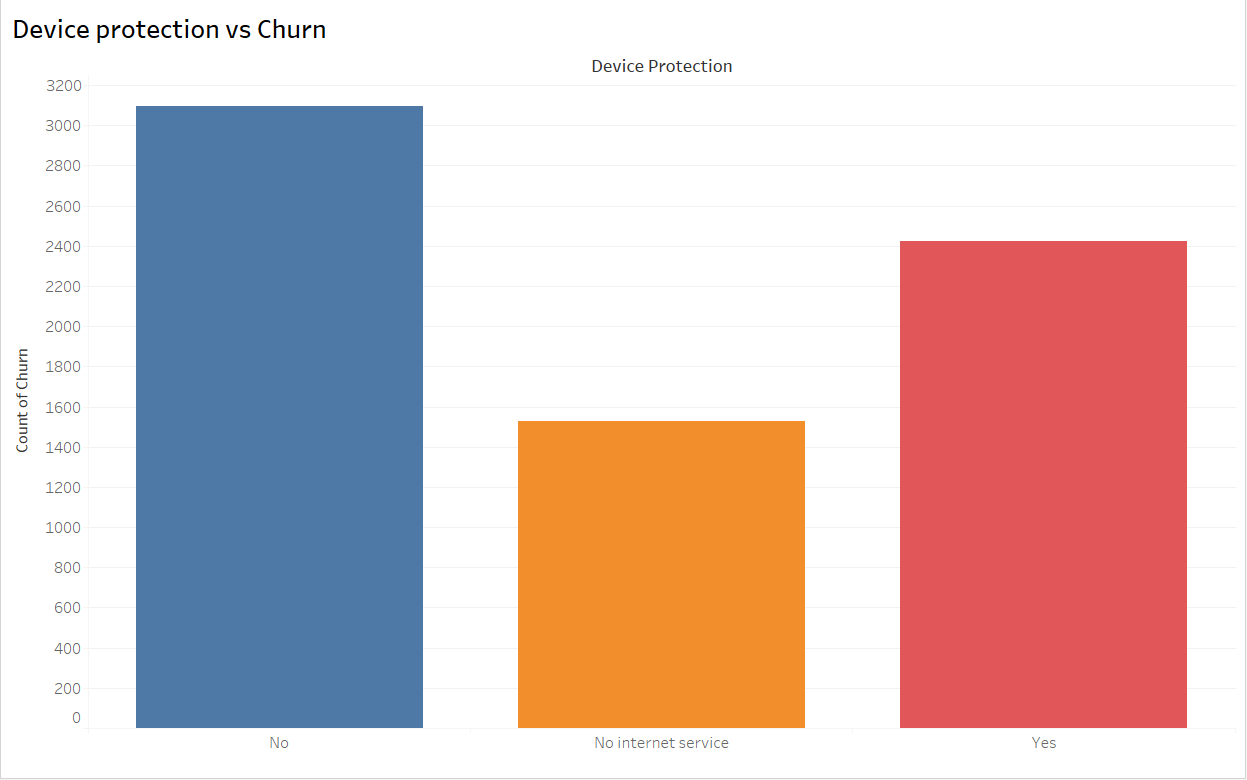

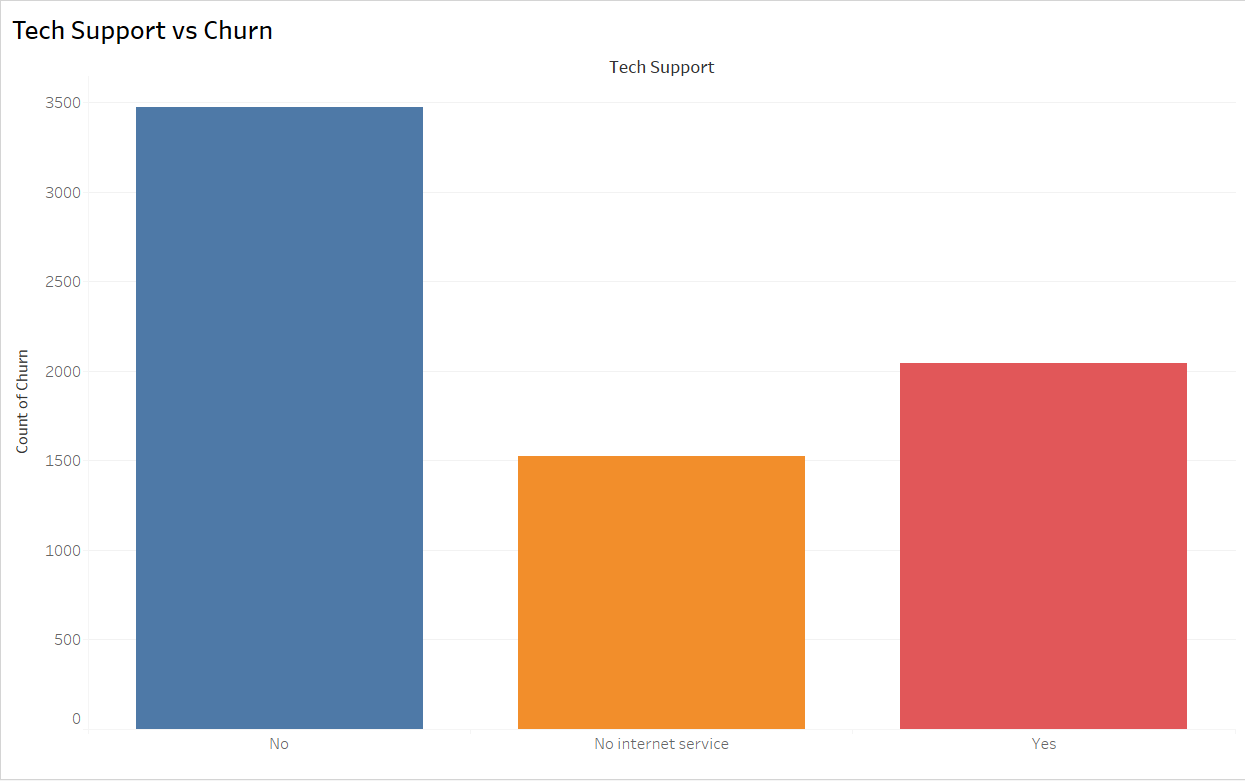

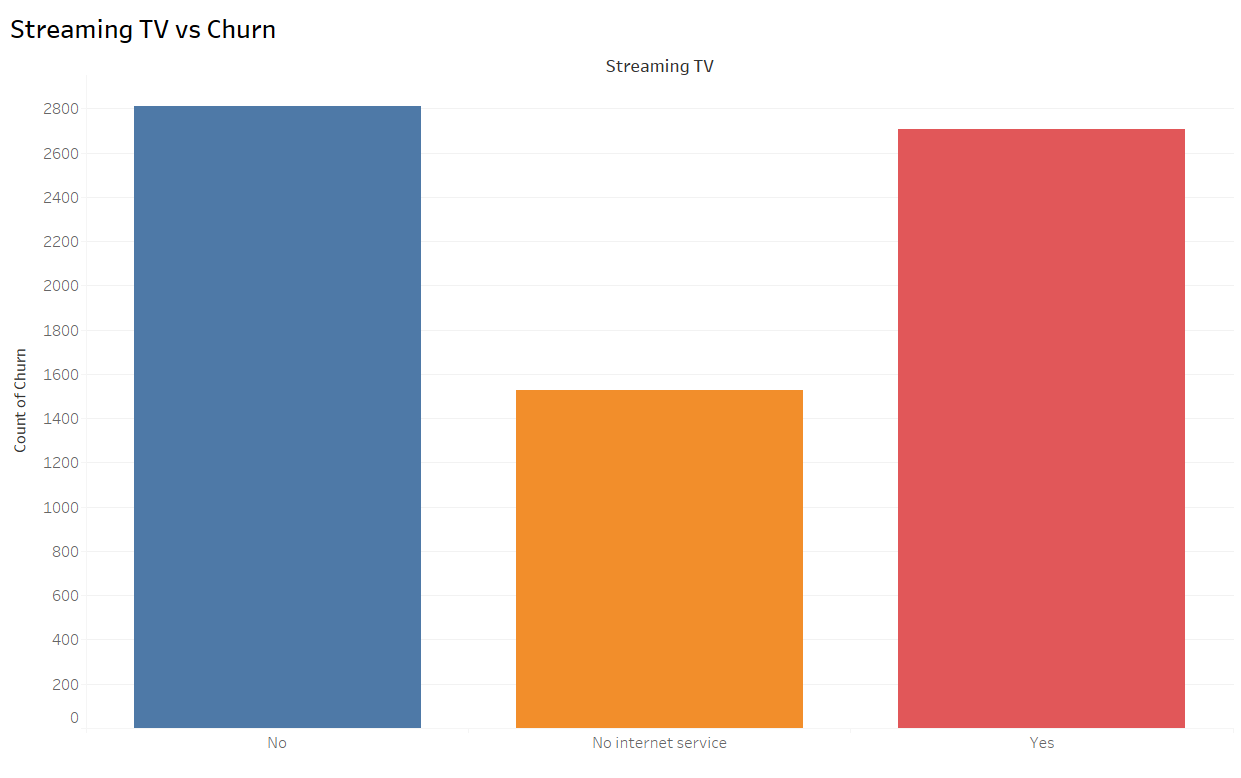

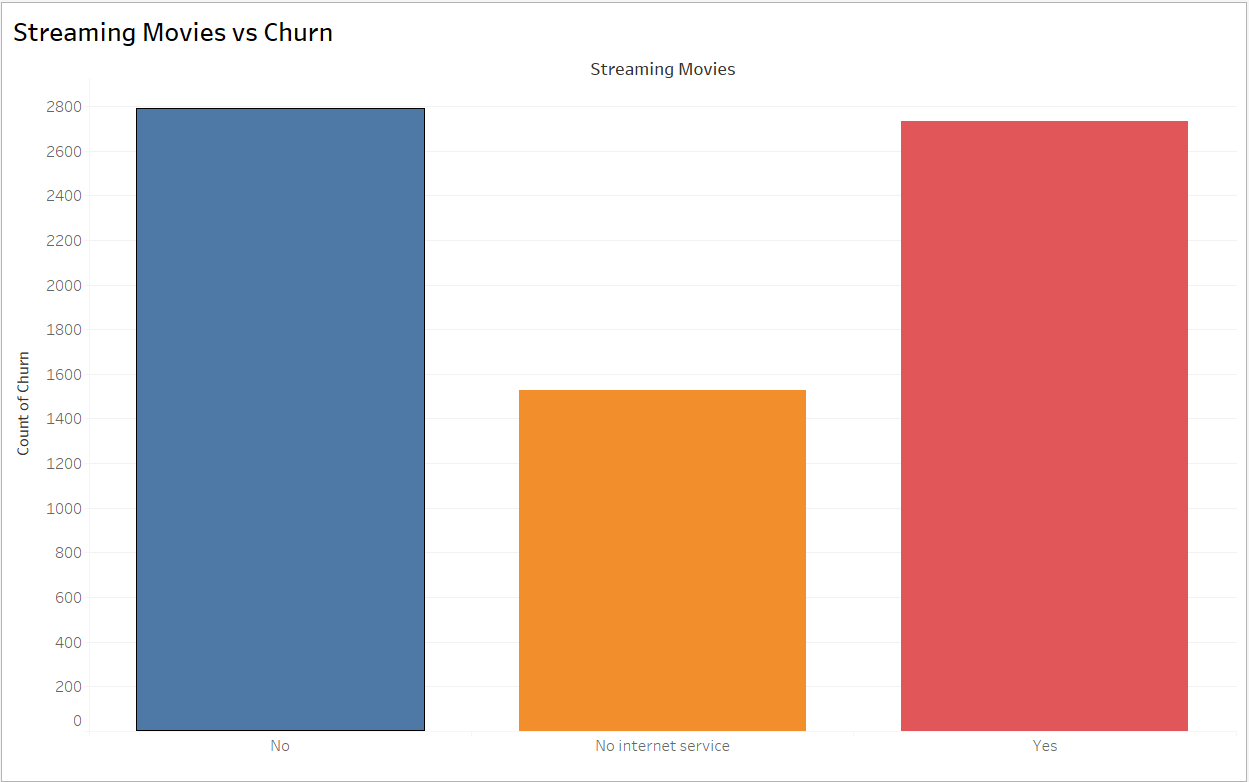

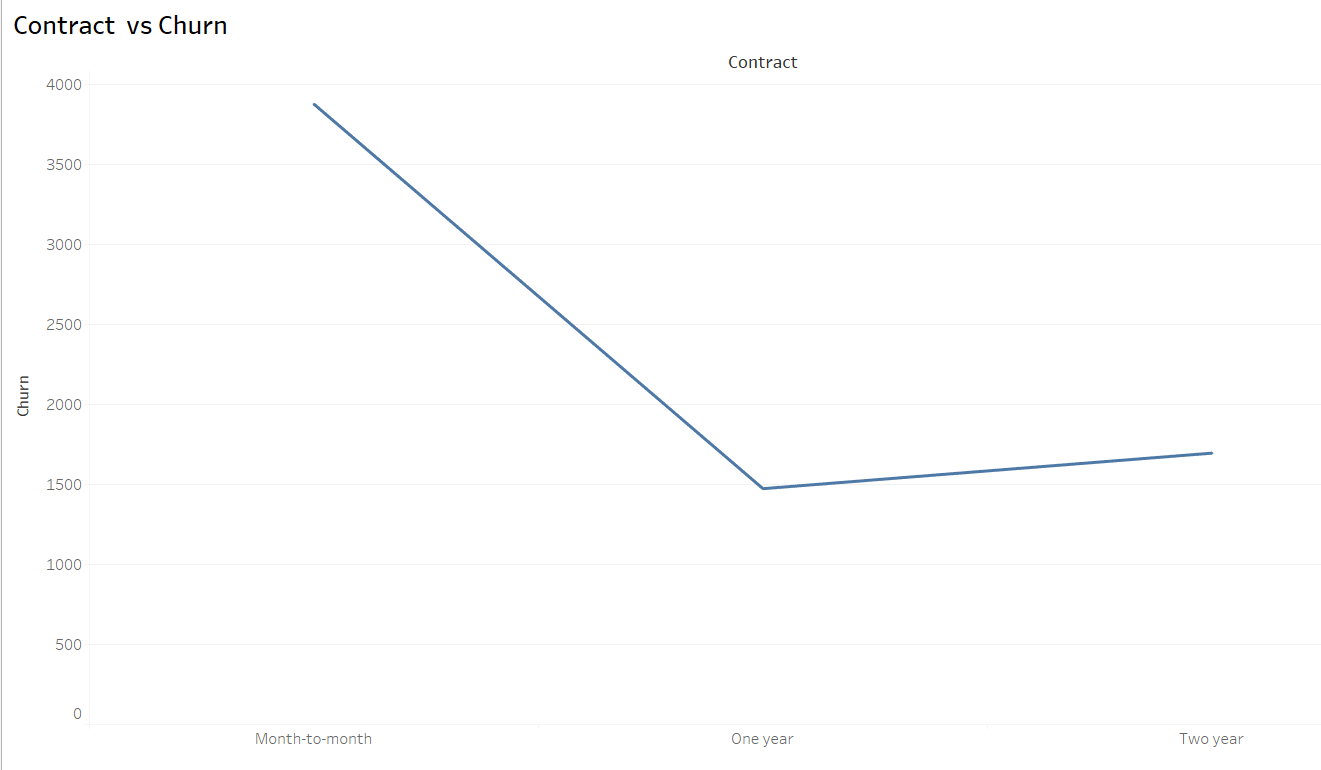

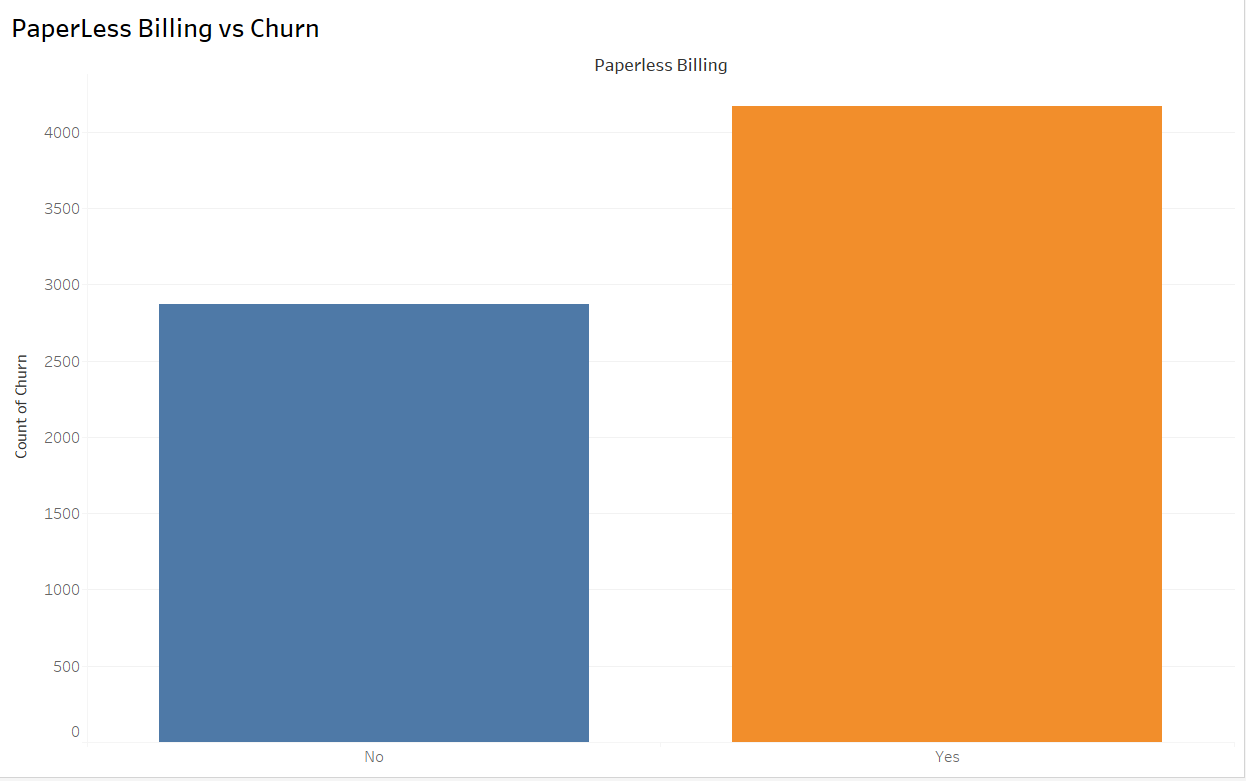

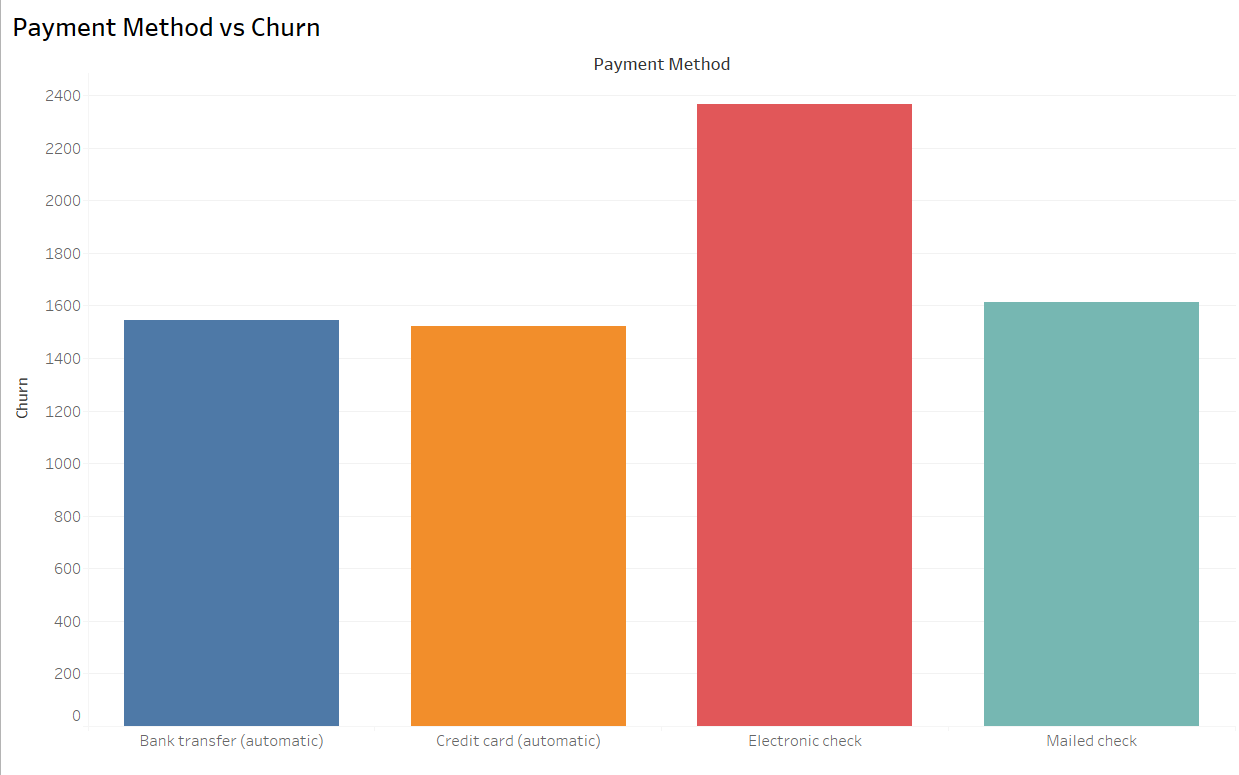

# **The ratio for monthly charges vs Churn is approx. 30% hence the variable is considerable.**

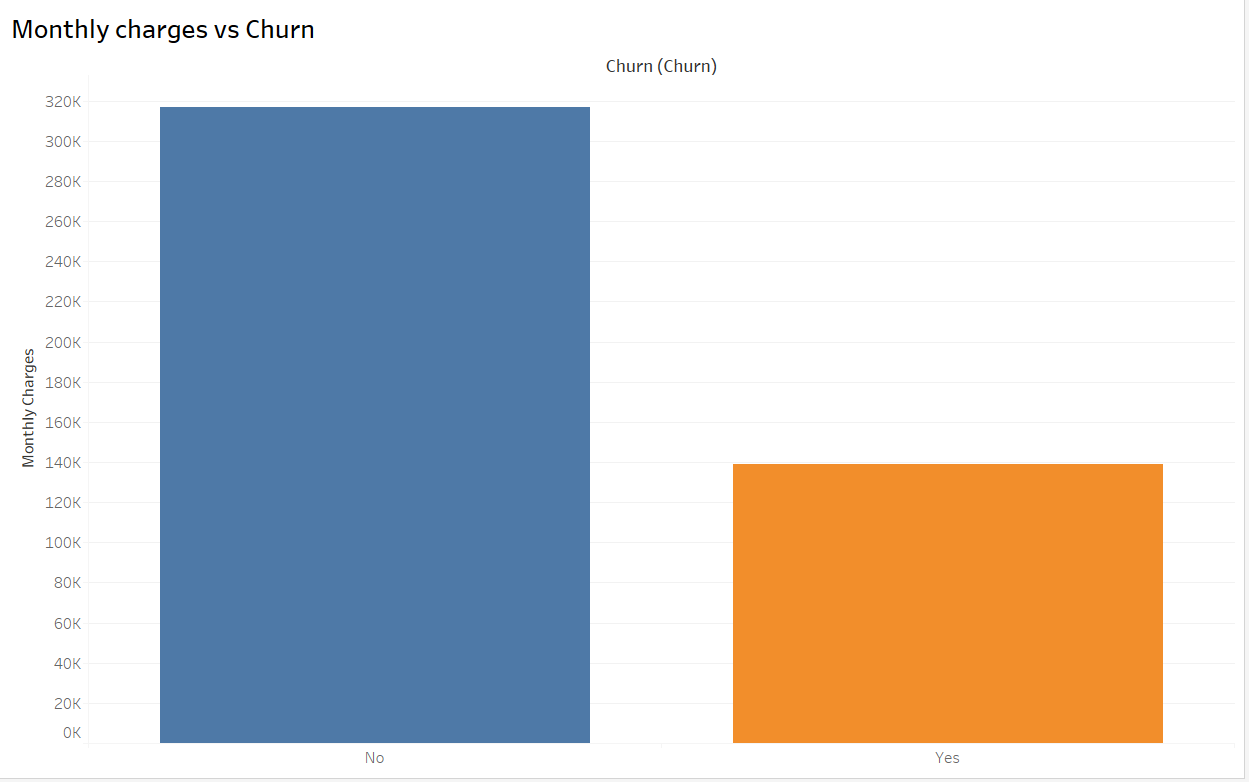

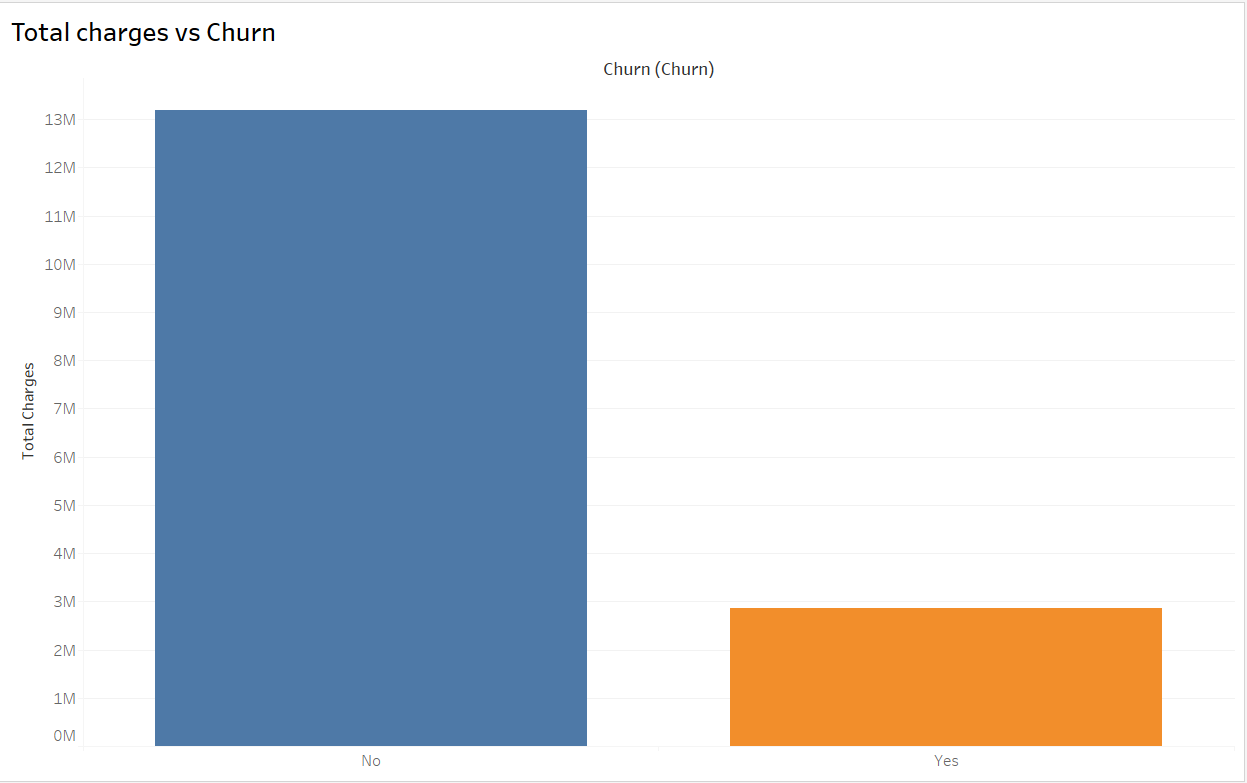

# **The ratio for total customers vs churn is approx 30%. Hence this variable is considerable.**

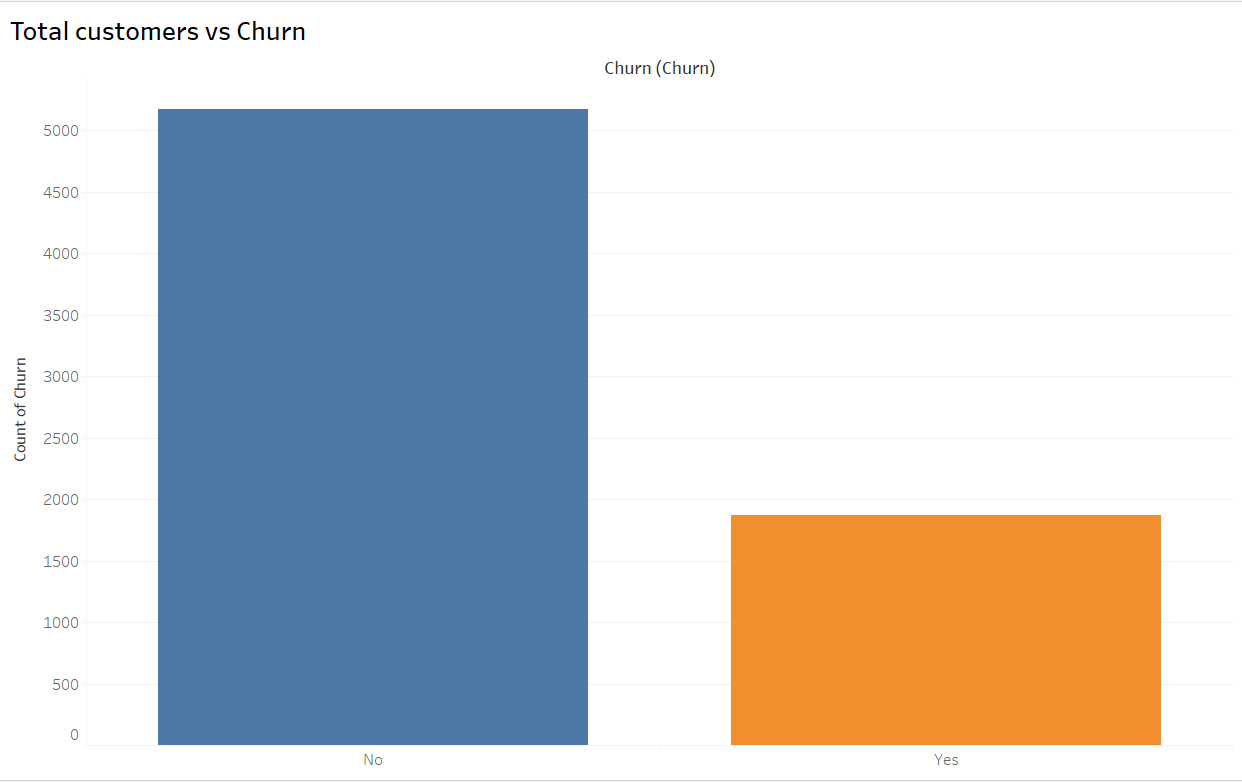

# **To check the multi-collinearity here it is a correlation matrix. Which shows whether there is a clue for multi-collinearity.**

In [14]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777


# **Here in the above cell we can see that there not a high corellation between the independent variables.Hence, there is no multi-collinearity**

Here I have used the Z-Score to find out the outliers 

In [15]:
import numpy as np
import pandas as pd

out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(data['tenure'])
Zscore_outlier(data['MonthlyCharges'])
Zscore_outlier(data1['TotalCharges'])

Outliers: []
Outliers: []
Outliers: []


# **Here in the above cell we can see that after using the z-Score method to find the outliers we get the empty arrays hence, there are no Outlier. So all the variables in the dataset must be used.**

# **DATA IMPLEMENTATION**

In [16]:
#splitting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
data1=pd.read_csv('/content/drive/MyDrive/Churn.csv')
x=data.iloc[:,:].values
y=data1.iloc[:,20].values
le=LabelEncoder()
y=le.fit_transform(y)
print(x)
print(y)

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.43,random_state=0)

[[  0.     0.     1.   ...   1.     2.    29.85]
 [  1.     0.     0.   ...   0.     3.    56.95]
 [  1.     0.     0.   ...   1.     3.    53.85]
 ...
 [  0.     0.     1.   ...   1.     2.    29.6 ]
 [  1.     1.     1.   ...   1.     3.    74.4 ]
 [  1.     0.     0.   ...   1.     0.   105.65]]
[0 0 1 ... 0 1 0]


In [17]:
data.head()
data.dtypes
print(data['PaymentMethod'])

0       2
1       3
2       3
3       0
4       2
       ..
7038    3
7039    1
7040    2
7041    3
7042    0
Name: PaymentMethod, Length: 7043, dtype: int64


In [18]:
#spot check Algorithms

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [19]:
#Evaluate the results
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s,%f (%f)' %(name,cv_results.mean(),cv_results.std()))

LR,0.804924 (0.015504)
LDA,0.801193 (0.014293)
KNN,0.770310 (0.014807)
CART,0.722230 (0.032796)
NB,0.755606 (0.018184)
SVM,0.791727 (0.012303)


In [20]:
#here we find that the validation accuracy for the training data is highest for logistic regresion.
#Hence we use Logistic Regression

model=LogisticRegression(solver='liblinear',multi_class='ovr')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

0.7969626939584021
[[1988  223]
 [ 392  426]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2211
           1       0.66      0.52      0.58       818

    accuracy                           0.80      3029
   macro avg       0.75      0.71      0.72      3029
weighted avg       0.79      0.80      0.79      3029



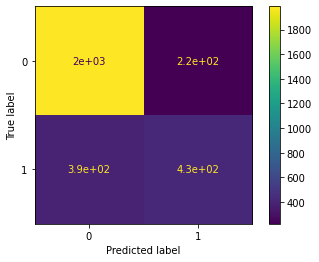

In [22]:
#Print accuracy score, confusion matrix and claassification report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [26]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70


Feature: 0, Score: -0.07609
Feature: 1, Score: 0.24043
Feature: 2, Score: 0.00813
Feature: 3, Score: -0.19605
Feature: 4, Score: -0.03301
Feature: 5, Score: -0.92846
Feature: 6, Score: 0.14866
Feature: 7, Score: 0.30970
Feature: 8, Score: -0.20889
Feature: 9, Score: -0.22057
Feature: 10, Score: -0.06024
Feature: 11, Score: -0.20712
Feature: 12, Score: -0.01744
Feature: 13, Score: -0.03215
Feature: 14, Score: -0.86436
Feature: 15, Score: 0.30497
Feature: 16, Score: 0.08608
Feature: 17, Score: 0.02685


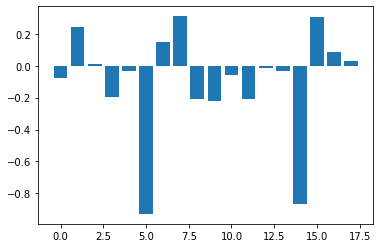

In [24]:
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# **ANSWERS TO THE QUESTIONS:**

---

1.I checked the dataset for missing values, outliers and multi-collinearity. After doing the following I didn't find any missing values, outliers and multicollinearity. 
Hence, All the parameters were used.

2.The dataset was tested with 6 different machine learning algorithms from which **"LOGISTIC REGRESSION"** showed the highest accuracy on the traning data. Later the model was run on the validation data and I got an accuracy of 
**79.69%**.

3.From the feature importance plot I can say that the key factors for Customer churn are Senior citizen,Multiple Lines,Internet Services,PaperLess billing and Payment method. These factors do make sense as these are some important factors.

4.Here according to the dataset it can be observed that there are only two categories of customers either they are senior citizens or they are not. So the senior citizens belong to age group >65yrs,where as the one who are not senior citizens belong to age group 18-65. 

The customers can be offered incentives such as better online security and backup. They can also be offered better device protection. Also incentives like streaming TV and Streaming Movies can be provided. They can be provided with easy payment method.Following these may encourage to remain with the company.

5.After the incentive program is rolled out to the customers, the first step will be gathering the data again for the above mentioned parameters in the dataset. Using data visualization, check for analysis of variance and correlation and other aspects of data analysis. If the value **"YES"** for the parameter **"CHURN"** has incresed than  the previous data available then we can conclude that the incentive program has worked.


